In [8]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [9]:
data.duplicated().sum()

np.int64(5268)

In [10]:
data[data.duplicated()]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


In [11]:
data['InvoiceNo'].duplicated().sum()


np.int64(516009)

In [12]:
duplicates = data[data.duplicated(subset='InvoiceNo', keep=False)]
duplicates


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [13]:
for col in data.columns:
    num_duplicates = data[col].duplicated().sum()
    print(f"{col}: {num_duplicates} duplicate values")


InvoiceNo: 516009 duplicate values
StockCode: 537839 duplicate values
Description: 537685 duplicate values
Quantity: 541187 duplicate values
InvoiceDate: 518649 duplicate values
UnitPrice: 540279 duplicate values
CustomerID: 537536 duplicate values
Country: 541871 duplicate values


In [14]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

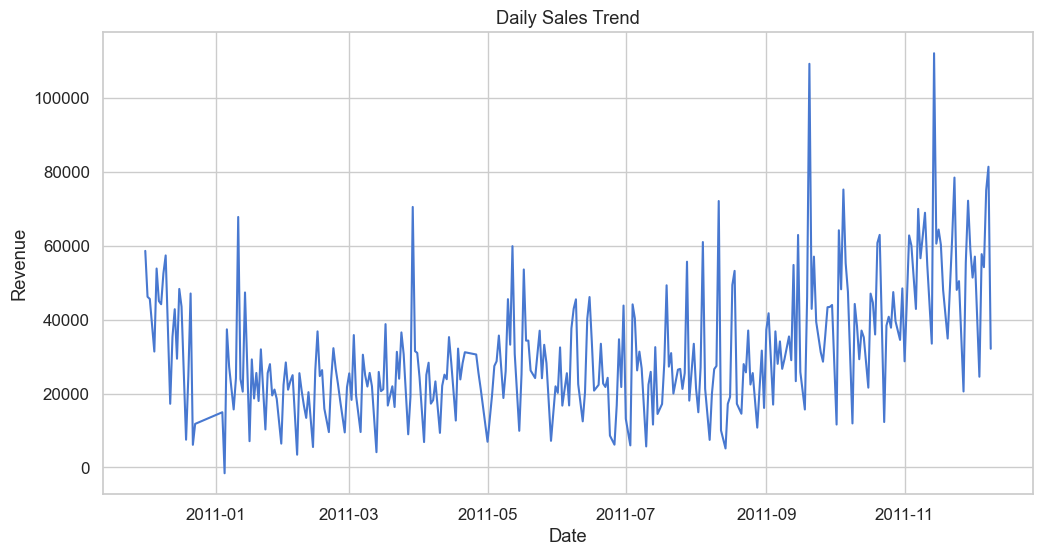

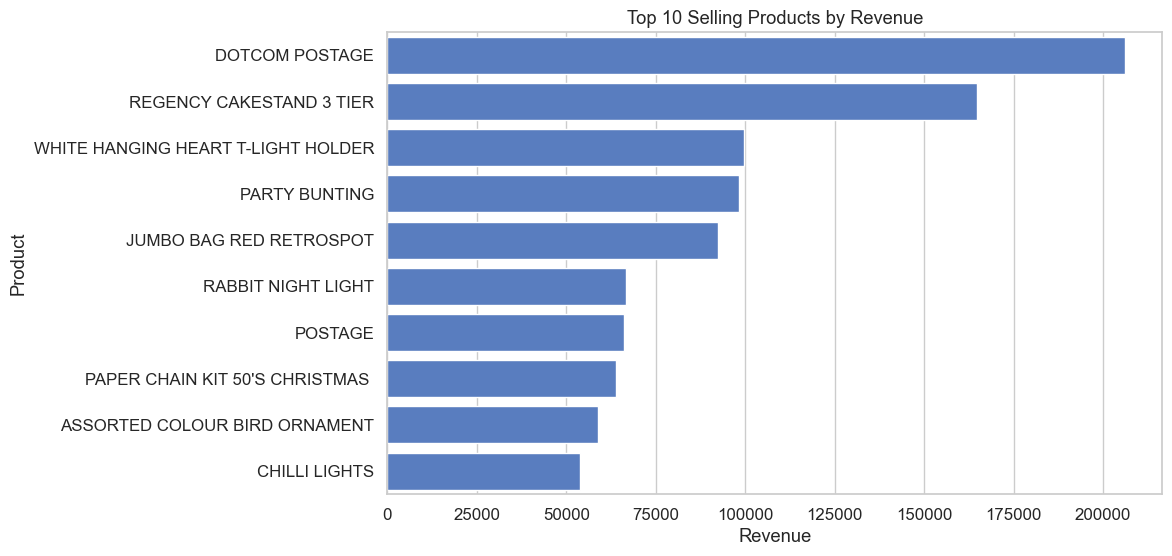

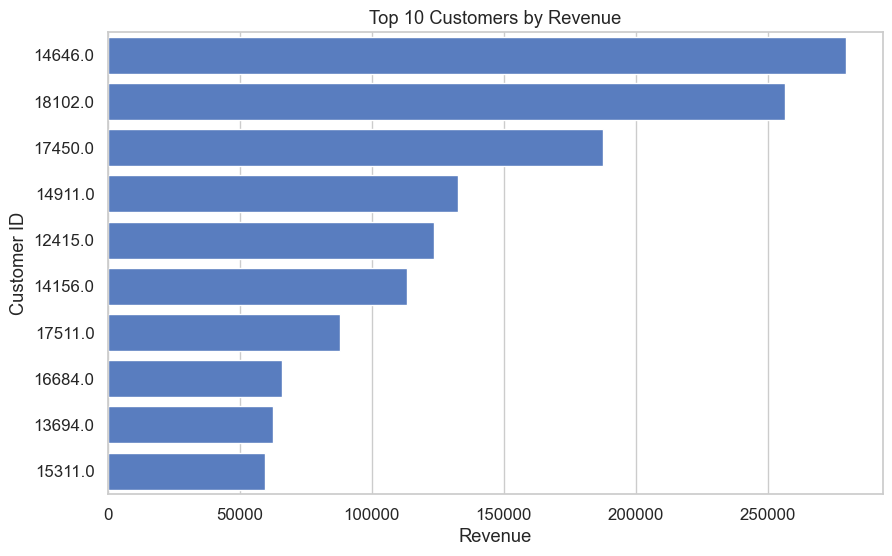

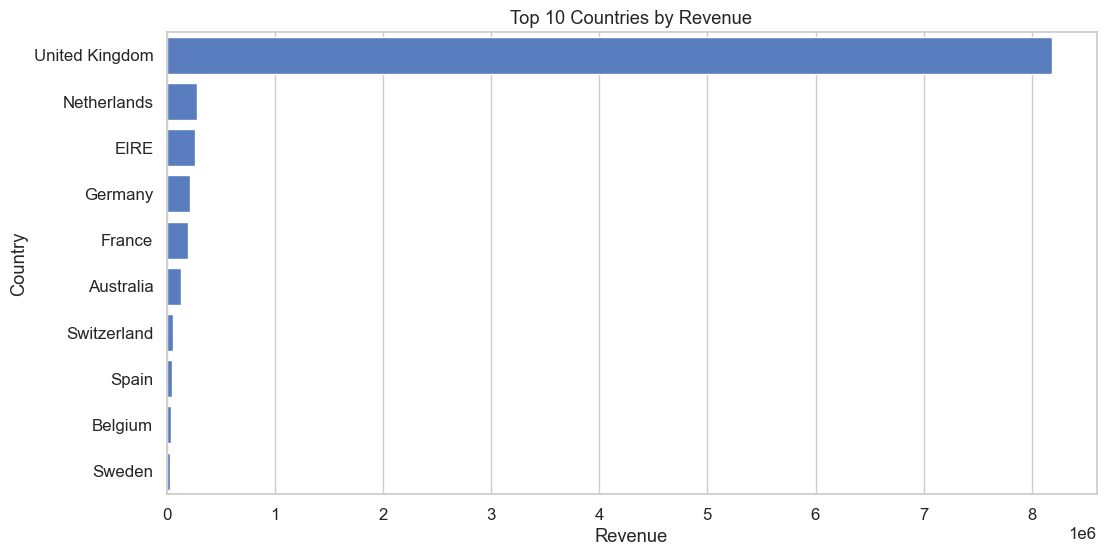

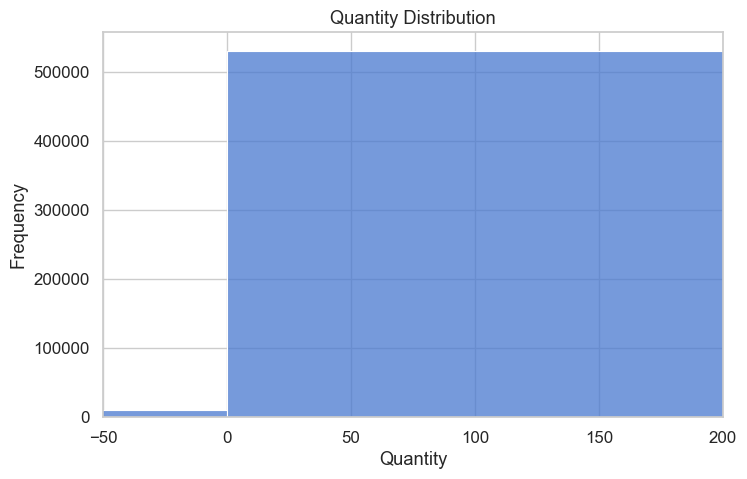

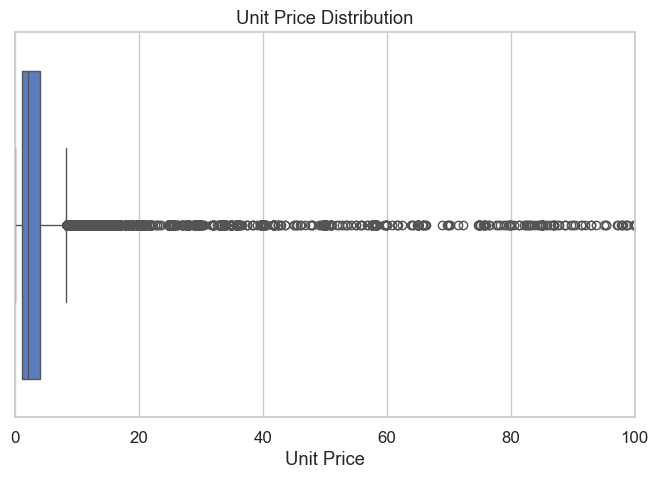

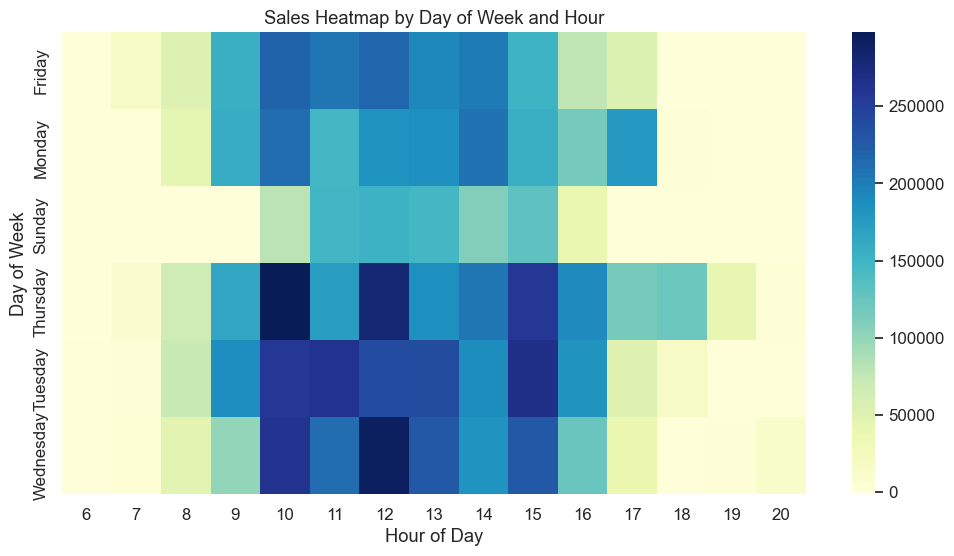

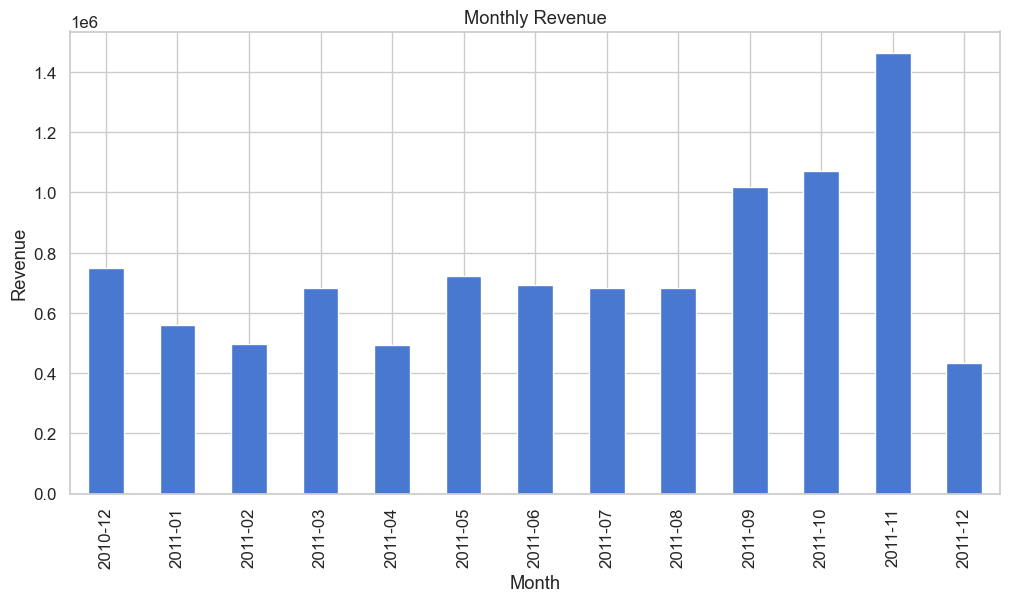

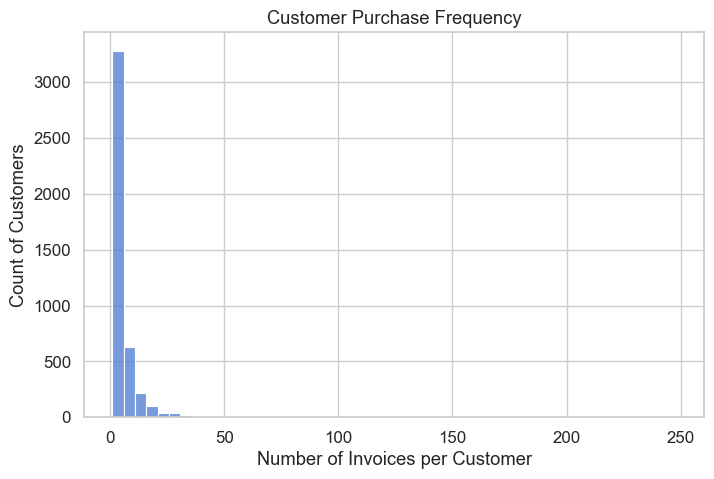

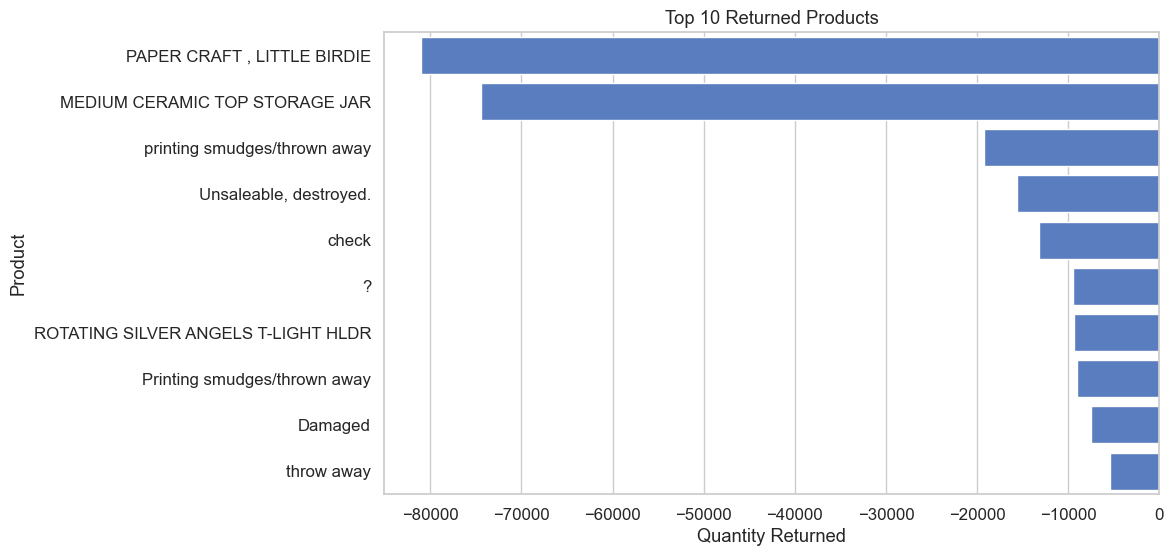

In [15]:
# =========================================
# E-Commerce Data Visualization Project
# =========================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# make plots look good
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# -------------------------------
# Load dataset
# -------------------------------
df = pd.read_csv("D:\\datasets\\ecommerce.csv",encoding='latin1')

# Convert InvoiceDate to datetime
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

# Add a Revenue column
df["Revenue"] = df["Quantity"] * df["UnitPrice"]

# -------------------------------
# 1. Sales Trends Over Time
# -------------------------------
daily_sales = df.groupby(df["InvoiceDate"].dt.date)["Revenue"].sum()

plt.figure(figsize=(12,6))
daily_sales.plot()
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()

# -------------------------------
# 2. Top Selling Products
# -------------------------------
top_products = df.groupby("Description")["Revenue"].sum().nlargest(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top 10 Selling Products by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Product")
plt.show()

# -------------------------------
# 3. Top Customers
# -------------------------------
top_customers = df.groupby("CustomerID")["Revenue"].sum().nlargest(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_customers.values, y=top_customers.index.astype(str))
plt.title("Top 10 Customers by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Customer ID")
plt.show()

# -------------------------------
# 4. Sales by Country
# -------------------------------
country_sales = df.groupby("Country")["Revenue"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=country_sales.values, y=country_sales.index)
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Country")
plt.show()

# -------------------------------
# 5. Quantity Distribution
# -------------------------------
plt.figure(figsize=(8,5))
sns.histplot(df["Quantity"], bins=50, kde=False)
plt.title("Quantity Distribution")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.xlim(-50, 200)   # limit for better visualization
plt.show()

# -------------------------------
# 6. Unit Price Distribution
# -------------------------------
plt.figure(figsize=(8,5))
sns.boxplot(x=df["UnitPrice"])
plt.title("Unit Price Distribution")
plt.xlabel("Unit Price")
plt.xlim(0, 100)   # limit to ignore extreme outliers
plt.show()

# -------------------------------
# 7. Sales by Hour/Day of Week
# -------------------------------
df["Hour"] = df["InvoiceDate"].dt.hour
df["DayOfWeek"] = df["InvoiceDate"].dt.day_name()

heatmap_data = df.groupby(["DayOfWeek", "Hour"])["Revenue"].sum().unstack(fill_value=0)

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap="YlGnBu")
plt.title("Sales Heatmap by Day of Week and Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()

# -------------------------------
# 8. Monthly Revenue Growth
# -------------------------------
monthly_sales = df.groupby(df["InvoiceDate"].dt.to_period("M"))["Revenue"].sum()

plt.figure(figsize=(12,6))
monthly_sales.plot(kind="bar")
plt.title("Monthly Revenue")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()

# -------------------------------
# 9. Customer Purchase Frequency
# -------------------------------
customer_invoices = df.groupby("CustomerID")["InvoiceNo"].nunique()

plt.figure(figsize=(8,5))
sns.histplot(customer_invoices, bins=50, kde=False)
plt.title("Customer Purchase Frequency")
plt.xlabel("Number of Invoices per Customer")
plt.ylabel("Count of Customers")
plt.show()

# -------------------------------
# 10. Returns Analysis
# -------------------------------
returns = df[df["Quantity"] < 0]
top_returns = returns.groupby("Description")["Quantity"].sum().nsmallest(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_returns.values, y=top_returns.index)
plt.title("Top 10 Returned Products")
plt.xlabel("Quantity Returned")
plt.ylabel("Product")
plt.show()
